#### Öncelikle şuraya değinmek istiyorum;

*Gözetimli öğrenmenin aksine, gözetimsiz öğrenme sadece bağımsız değişkenlere sahiptir yani bağımlı değişken yoktur. Kısaca, veri etiketsizdir. Bu yüzden gözetimsiz öğrenme problemlerinde hedef değişken olmadığı için modelimizin doğruluğunu test etmemiz ve nerede durmamız gerektiğini belirlememiz de zor. Yine de bu modelleri basitçe test edebiliriz. Kümeleme yaparken hedeflediğimiz ve ya makul olan sonuçları seçebiliriz.*

**“Davies Bouldin Score” ise kümeler arası ortalama benzerliği ölçmek için kullanılır. Bu oran için düşük değerler tercih edilir ve minimum skor değeri 0 dır. Daha düşük değerler daha iyi kümelemeyi gösterir.**

### Davies–Bouldin İndeksi Yöntemi

Davies–Bouldin İndeksi (DBI), kümeleme algoritmalarının performansını değerlendirmek için kullanılan bir metriktir. Küme içi sıkılığı (compactness) ve kümeler arası ayrımı (separation) ölçer; daha düşük bir DBI değeri, daha iyi küme kalitesine işaret eder.

- Daha düşük DBI değerleri, kümelerin hem daha tanımlı hem de birbirinden daha ayrık olduğunu gösterir.  
- Farklı \(K\) değerleri için DBI karşılaştırması yaparak en uygun küme sayısının seçilmesinde kullanılır.

```python
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score

# Örnek: k=3 için DBI hesaplama
kmeans = KMeans(n_clusters=3, random_state=42).fit(X)
labels = kmeans.labels_
db_index = davies_bouldin_score(X, labels)
print(f'k=3 için Davies–Bouldin İndeksi: {db_index}')

In [ ]:
import numpy as np
from sklearn.datasets import load_iris # sklearn kütüphanesinden iris veri setini yüklemek için load_iris fonksiyonunu import ettik
from sklearn.cluster import KMeans # Denetimsiz öğrenme algoritmalarından KMeans'i import ettik
from sklearn.metrics import davies_bouldin_score # metrics modülünden davies_bouldin_score fonksiyonunu import ettik
import matplotlib.pyplot as plt

In [ ]:
data = load_iris() # iris veri setini yükledik
X = data.data # Özellikleri X değişkenine atadık

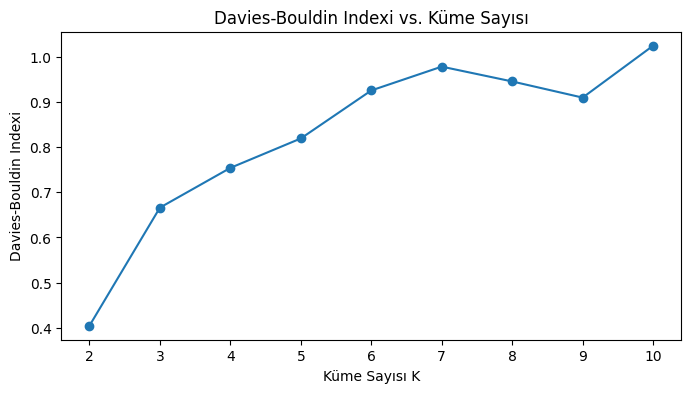

In [7]:
db_scores = [] # Davies-Bouldin skoru için boş bir liste oluşturduk
k_values = range(2, 11) # 2'den 10'a kadar olan k değerlerini belirledik
for k in k_values: # k değerleri için döngü başlatıyoruz
    kmeans = KMeans(n_clusters=k, random_state=42).fit(X) # KMeans algoritmasını k değerine göre uyguluyoruz
    labels = kmeans.labels_ # KMeans algoritması ile elde edilen etiketleri labels değişkenine atıyoruz
    score = davies_bouldin_score(X, labels) # Davies-Bouldin skoru hesaplıyoruz
    db_scores.append(score) # Hesaplanan skoru db_scores listesine ekliyoruz

# Sonuçları görselleştirmek için matplotlib kütüphanesini kullanıyoruz
plt.figure(figsize=(8, 4))
plt.plot(k_values, db_scores, marker='o')
plt.title('Davies-Bouldin Indexi vs. Küme Sayısı')
plt.xlabel('Küme Sayısı K')
plt.ylabel('Davies-Bouldin Indexi')
plt.show()

In [6]:
# En iyi k değerini bulmak için en düşük Davies-Bouldin skorunu buluyoruz
best_k = k_values[np.argmin(db_scores)]
print(f'En iyi davies bouldin indexi: {best_k}')

En iyi davies bouldin indexi: 2
